In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = '/content/SMSSpamCollection'
data = pd.read_csv(file_path,sep='\t',header=None)

In [ ]:
data.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.describe()

,0,1
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
data.rename(columns={0: 'label', 1: 'message'}, inplace=True)

In [ ]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


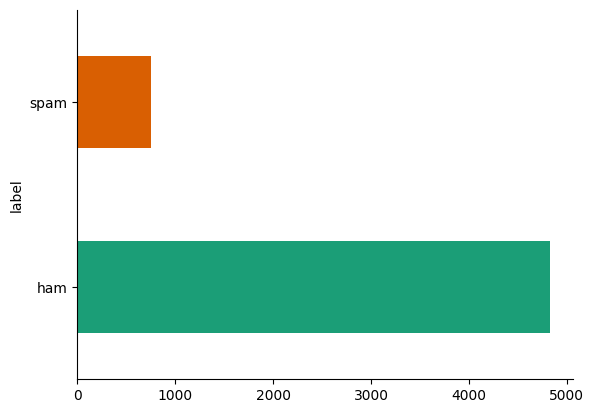

In [ ]:
data.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
def preprocess_data(data):
    """Preprocess the data by converting labels to binary values."""
    data['label'] = data['label'].map({'ham': 0, 'spam': 1})
    return data
def split_data(data):
    """Split the data into train, validation, and test sets."""
    train_data, temp_data = train_test_split(data, test_size=0.4, random_state=42, stratify=data['label'])
    validation_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42, stratify=temp_data['label'])
    return train_data, validation_data, test_data
def save_splits(train_data, validation_data, test_data):
    """Save the splits into CSV files."""
    train_data.to_csv('train.csv', index=False)
    validation_data.to_csv('validation.csv', index=False)
    test_data.to_csv('test.csv', index=False)
def vectorize_data(data):
    """Vectorize the main data using TF-IDF."""
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(data['message'])


    with open('tfidf_vectorizer.pkl', 'wb') as f:
        pickle.dump(vectorizer, f)

    return X, vectorizer
def transform_splits(vectorizer, train_data, validation_data, test_data):
    """Transform the splits using the vectorizer."""
    X_train = vectorizer.transform(train_data['message'])
    X_validation = vectorizer.transform(validation_data['message'])
    X_test = vectorizer.transform(test_data['message'])

    y_train = train_data['label']
    y_validation = validation_data['label']
    y_test = test_data['label']

    return X_train, X_validation, X_test, y_train, y_validation, y_test


In [ ]:
preprocess_data(data)
train_data, validation_data, test_data = split_data(data)
save_splits(train_data, validation_data, test_data)
print("Data splits saved: train.csv, validation.csv, test.csv")
X, vectorizer = vectorize_data(data)
X_train, X_validation, X_test, y_train, y_validation, y_test = transform_splits(vectorizer, train_data, validation_data, test_data)


Data splits saved: train.csv, validation.csv, test.csv


In [ ]:
train_data.head()

,label,message
2821,1,INTERFLORA - It's not too late to order Inter...
5065,0,I dunno lei... Like dun haf...
1009,0,"Poyyarikatur,kolathupalayam,unjalur post,erode..."
1945,0,"Yeah, I'll leave in a couple minutes &amp; let..."
698,0,meet you in corporation st outside gap … you c...


In [ ]:
test_data.head()

,label,message
4559,0,PISS IS TALKING IS SOMEONE THAT REALISE U THAT...
3544,0,I'm e person who's doing e sms survey...
5489,0,Oh thanks a lot..i already bought 2 eggs ..
382,0,"Yeah sure, give me a couple minutes to track d..."
836,0,Good Morning my Dear........... Have a great &...


In [ ]:
validation_data.head()

,label,message
4575,0,:( but your not here....
3130,0,"Haha better late than ever, any way I could sw..."
4651,0,Finally it has happened..! Aftr decades..! BEE...
136,0,I only haf msn. It's yijue@hotmail.com
4433,0,Dont think you need yellow card for uk travel....


In [ ]:
len(train_data),len(test_data),len(validation_data)

(3343, 1115, 1114)